Set environmental parameters

In [51]:
import os
import cv2
import torch

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

device = torch.device('cuda')

In [52]:
torch.backends.cudnn.enabled = True
torch.backends.cudnn.benchmark = True

Set Model Configuration and Logger

In [53]:
from nanodet.util import cfg, load_config, Logger 

In [78]:
config_path = 'config/nanodet_m_traf1.yml'
model_path = 'model/nanodet_m_traf1/model_last.pth'
image_path = 'data/TestIJCNN2013/00059.ppm'

In [79]:
load_config(cfg, config_path)
logger = Logger(-1, use_tensorboard=False)

Set Model Predictor

In [80]:
from demo.demo import Predictor

In [81]:
predictor = Predictor(cfg, model_path, logger, device=device)

model size is  1.0x
init weights...
=> loading pretrained model https://download.pytorch.org/models/shufflenetv2_x1-5666bf0f80.pth
Finish initialize Lite GFL Head.


In [82]:
meta, res = predictor.inference(image_path)

forward time: 0.006s | decode time: 0.002s | 

Detection output visualisation

In [83]:
from nanodet.util import overlay_bbox_cv

from IPython.display import display
from PIL import Image

def cv2_imshow(a, convert_bgr_to_rgb=True):
    """A replacement for cv2.imshow() for use in Jupyter notebooks.
    Args:
        a: np.ndarray. shape (N, M) or (N, M, 1) is an NxM grayscale image. shape
            (N, M, 3) is an NxM BGR color image. shape (N, M, 4) is an NxM BGRA color
            image.
        convert_bgr_to_rgb: switch to convert BGR to RGB channel.
    """
    a = a.clip(0, 255).astype('uint8')
    # cv2 stores colors as BGR; convert to RGB
    if convert_bgr_to_rgb and a.ndim == 3:
        if a.shape[2] == 4:
            a = cv2.cvtColor(a, cv2.COLOR_BGRA2RGBA)
        else:
            a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
    display(Image.fromarray(a))

In [84]:
result = overlay_bbox_cv(meta['raw_img'], res, cfg.class_names, score_thresh=0.35)

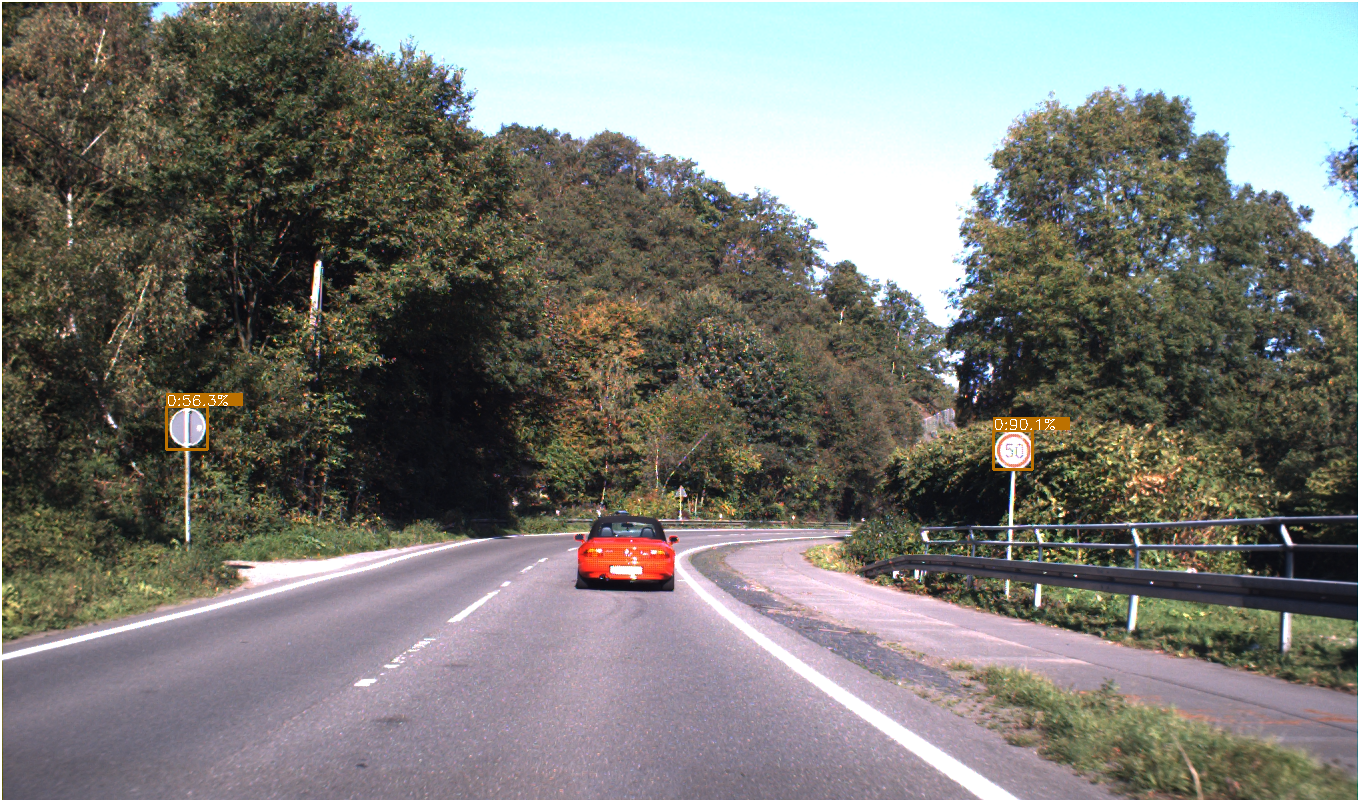

In [85]:
imshow_scale = 1.0
cv2_imshow(cv2.resize(result, None, fx=imshow_scale, fy=imshow_scale))